<a href="https://colab.research.google.com/github/AgnieszkaBorys/data-science-bootcamp/blob/master/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASE STUDY - DANE GIEŁDOWE


IMPORT BIBLIOTEK

In [1]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.18.4
Pandas: 1.0.3


ZAŁADOWANIE DANYCH

In [0]:
def fetch_financial_data(company='AMZN'):
  """Pobiera dane dotyczące notowań spółek na giełdzie według symboli na serwisie stooq.pl"""
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

In [0]:
df = fetch_financial_data()
df.info()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-05-07 to 2015-05-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


EKSPLORACJA DANYCH

In [0]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-07,2374.78,2376.00,2343.1100,2367.61,3396411
2020-05-06,2329.44,2357.45,2320.0000,2351.26,3117814
2020-05-05,2340.00,2351.00,2307.1251,2317.80,3242496
2020-05-04,2256.38,2326.98,2256.3800,2315.99,4865926
2020-05-01,2336.80,2362.44,2258.1901,2286.04,9772605
...,...,...,...,...,...
2015-05-15,428.00,430.40,424.3000,426.00,4240281
2015-05-14,429.45,433.00,427.0100,432.28,1888400
2015-05-13,429.58,433.53,425.8000,426.87,1996328


In [0]:
df.head(10)  #ostatnie 10 obiektów

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-07,2374.78,2376.0000,2343.1100,2367.61,3396411
2020-05-06,2329.44,2357.4500,2320.0000,2351.26,3117814
2020-05-05,2340.00,2351.0000,2307.1251,2317.80,3242496
2020-05-04,2256.38,2326.9800,2256.3800,2315.99,4865926
2020-05-01,2336.80,2362.4400,2258.1901,2286.04,9772605
2020-04-30,2419.84,2475.0000,2396.0100,2474.00,9534611
2020-04-29,2330.01,2391.8900,2310.0000,2372.71,4591593
2020-04-28,2372.10,2373.5000,2306.0000,2314.08,5269446
2020-04-27,2443.20,2444.8800,2363.0000,2376.00,5645645


In [0]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2015-05-22,431.55,432.44,427.61,427.63,2020600
2015-05-21,428.00,436.90,428.00,431.63,4121400
2015-05-20,420.60,427.10,418.36,423.86,2196159
2015-05-19,424.94,428.24,420.63,421.71,2465240
2015-05-18,426.00,427.27,421.46,425.24,2389462
2015-05-15,428.00,430.40,424.30,426.00,4240281
2015-05-14,429.45,433.00,427.01,432.28,1888400
2015-05-13,429.58,433.53,425.80,426.87,1996328
2015-05-12,431.08,433.25,426.71,431.02,1947817


In [0]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [0]:
df.columns = [col.lower() for col in df.columns]

In [0]:
df.head()

,open,high,low,close,volume
Date,,,,,
2020-05-07,2374.78,2376.00,2343.1100,2367.61,3396411
2020-05-06,2329.44,2357.45,2320.0000,2351.26,3117814
2020-05-05,2340.00,2351.00,2307.1251,2317.80,3242496
2020-05-04,2256.38,2326.98,2256.3800,2315.99,4865926
2020-05-01,2336.80,2362.44,2258.1901,2286.04,9772605


In [0]:
df.describe()

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1231.363907,1243.325757,1217.802845,1231.251045,4.202311e+06
std,539.524643,545.630430,532.945503,539.591418,2.222173e+06
min,420.600000,426.800000,418.360000,421.710000,8.813370e+05
25%,752.732500,757.815000,744.397500,751.080000,2.714950e+06
50%,1109.075000,1124.100000,1104.945000,1116.130000,3.639696e+06
75%,1764.307500,1779.225000,1745.387500,1764.195000,4.953428e+06
max,2443.200000,2475.000000,2396.010000,2474.000000,2.190930e+07


In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.231364e+03,5.395246e+02,420.60,7.527325e+02,1109.075,1.764307e+03,2443.20
high,1258.0,1.243326e+03,5.456304e+02,426.80,7.578150e+02,1124.100,1.779225e+03,2475.00
low,1258.0,1.217803e+03,5.329455e+02,418.36,7.443975e+02,1104.945,1.745387e+03,2396.01
close,1258.0,1.231251e+03,5.395914e+02,421.71,7.510800e+02,1116.130,1.764195e+03,2474.00
volume,1258.0,4.202311e+06,2.222173e+06,881337.00,2.714950e+06,3639696.500,4.953428e+06,21909300.00


SELEKCJA KOLUMN

In [0]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2020-05-07,2374.78,2376.0000,2343.1100,2367.61,3396411
2020-05-06,2329.44,2357.4500,2320.0000,2351.26,3117814
2020-05-05,2340.00,2351.0000,2307.1251,2317.80,3242496
2020-05-04,2256.38,2326.9800,2256.3800,2315.99,4865926
2020-05-01,2336.80,2362.4400,2258.1901,2286.04,9772605
2020-04-30,2419.84,2475.0000,2396.0100,2474.00,9534611
2020-04-29,2330.01,2391.8900,2310.0000,2372.71,4591593
2020-04-28,2372.10,2373.5000,2306.0000,2314.08,5269446
2020-04-27,2443.20,2444.8800,2363.0000,2376.00,5645645


In [0]:
df['open']

Date
2020-05-07    2374.78
2020-05-06    2329.44
2020-05-05    2340.00
2020-05-04    2256.38
2020-05-01    2336.80
2020-04-30    2419.84
2020-04-29    2330.01
2020-04-28    2372.10
2020-04-27    2443.20
2020-04-24    2417.00
Name: open, dtype: float64

In [0]:
df.open

Date
2020-05-07    2374.78
2020-05-06    2329.44
2020-05-05    2340.00
2020-05-04    2256.38
2020-05-01    2336.80
2020-04-30    2419.84
2020-04-29    2330.01
2020-04-28    2372.10
2020-04-27    2443.20
2020-04-24    2417.00
Name: open, dtype: float64

In [0]:
df[['open', 'close']]

,open,close
Date,,
2020-05-07,2374.78,2367.61
2020-05-06,2329.44,2351.26
2020-05-05,2340.00,2317.80
2020-05-04,2256.38,2315.99
2020-05-01,2336.80,2286.04
2020-04-30,2419.84,2474.00
2020-04-29,2330.01,2372.71
2020-04-28,2372.10,2314.08
2020-04-27,2443.20,2376.00


In [0]:
df.iloc[:, 0]

Date
2020-05-07    2374.78
2020-05-06    2329.44
2020-05-05    2340.00
2020-05-04    2256.38
2020-05-01    2336.80
2020-04-30    2419.84
2020-04-29    2330.01
2020-04-28    2372.10
2020-04-27    2443.20
2020-04-24    2417.00
Name: open, dtype: float64

In [0]:
df.iloc[:, [0,3]]

,open,close
Date,,
2020-05-07,2374.78,2367.61
2020-05-06,2329.44,2351.26
2020-05-05,2340.00,2317.80
2020-05-04,2256.38,2315.99
2020-05-01,2336.80,2286.04
2020-04-30,2419.84,2474.00
2020-04-29,2330.01,2372.71
2020-04-28,2372.10,2314.08
2020-04-27,2443.20,2376.00


In [0]:
df.iloc[:, 3:5]

,close,volume
Date,,
2020-05-07,2367.61,3396411
2020-05-06,2351.26,3117814
2020-05-05,2317.80,3242496
2020-05-04,2315.99,4865926
2020-05-01,2286.04,9772605
2020-04-30,2474.00,9534611
2020-04-29,2372.71,4591593
2020-04-28,2314.08,5269446
2020-04-27,2376.00,5645645


In [0]:
df.iloc[:, -1]

Date
2020-05-07    3396411
2020-05-06    3117814
2020-05-05    3242496
2020-05-04    4865926
2020-05-01    9772605
2020-04-30    9534611
2020-04-29    4591593
2020-04-28    5269446
2020-04-27    5645645
2020-04-24    3831797
Name: volume, dtype: int64

In [0]:
df.iloc[:, [-1]]

,volume
Date,
2020-05-07,3396411
2020-05-06,3117814
2020-05-05,3242496
2020-05-04,4865926
2020-05-01,9772605
2020-04-30,9534611
2020-04-29,4591593
2020-04-28,5269446
2020-04-27,5645645


In [0]:
df.iloc[:, -2:]

,close,volume
Date,,
2020-05-07,2367.61,3396411
2020-05-06,2351.26,3117814
2020-05-05,2317.80,3242496
2020-05-04,2315.99,4865926
2020-05-01,2286.04,9772605
2020-04-30,2474.00,9534611
2020-04-29,2372.71,4591593
2020-04-28,2314.08,5269446
2020-04-27,2376.00,5645645


SELEKCJA WIERSZY

In [0]:
df.iloc[0]

open         2374.78
high         2376.00
low          2343.11
close        2367.61
volume    3396411.00
Name: 2020-05-07 00:00:00, dtype: float64

In [0]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2020-05-07,2374.78,2376.00,2343.1100,2367.61,3396411
2020-05-06,2329.44,2357.45,2320.0000,2351.26,3117814
2020-05-05,2340.00,2351.00,2307.1251,2317.80,3242496


In [0]:
df.loc['2020-05-07']

,open,high,low,close,volume
Date,,,,,
2020-05-07,2374.78,2376.0,2343.11,2367.61,3396411


In [0]:
df.loc['2020-05-07': '2020-05-01']

,open,high,low,close,volume
Date,,,,,
2020-05-07,2374.78,2376.00,2343.1100,2367.61,3396411
2020-05-06,2329.44,2357.45,2320.0000,2351.26,3117814
2020-05-05,2340.00,2351.00,2307.1251,2317.80,3242496
2020-05-04,2256.38,2326.98,2256.3800,2315.99,4865926
2020-05-01,2336.80,2362.44,2258.1901,2286.04,9772605


OBLICZANIE NOWYCH KOLUMN

In [4]:
df = fetch_financial_data('UBER')
df.info()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-05-08 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    252 non-null    float64
 1   High    252 non-null    float64
 2   Low     252 non-null    float64
 3   Close   252 non-null    float64
 4   Volume  252 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [5]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-08,32.59,33.3000,31.64,32.79,69525793
2020-05-07,29.60,31.6500,29.58,30.93,62229496
2020-05-06,27.50,28.0600,26.81,27.82,31076451
2020-05-05,28.25,28.9088,27.44,28.07,30725371
2020-05-04,27.56,28.0700,26.58,27.42,23428333


In [6]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-05-16,41.48,44.06,41.25,43.00,38115524
2019-05-15,39.37,41.88,38.95,41.29,36086065
2019-05-14,38.31,39.96,36.85,39.96,46661147
2019-05-13,38.79,39.24,36.08,37.10,79442420
2019-05-10,42.00,45.00,41.06,41.57,186322536


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,252.0,3.411928e+01,6.434857e+00,15.96,2.912500e+01,3.295000e+01,4.011500e+01,4.698000e+01
High,252.0,3.481736e+01,6.348672e+00,17.80,2.969500e+01,3.365500e+01,4.091750e+01,4.708000e+01
Low,252.0,3.329540e+01,6.462575e+00,13.71,2.863250e+01,3.214000e+01,3.942000e+01,4.508000e+01
Close,252.0,3.407710e+01,6.367056e+00,14.82,2.914000e+01,3.292500e+01,4.011250e+01,4.638000e+01
Volume,252.0,2.520058e+07,2.204240e+07,3380003.00,8.733446e+06,2.070551e+07,3.455765e+07,1.863225e+08


In [9]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-05-08,32.59,33.3000,31.64,32.79,69525793,32.690
2020-05-07,29.60,31.6500,29.58,30.93,62229496,30.265
2020-05-06,27.50,28.0600,26.81,27.82,31076451,27.660
2020-05-05,28.25,28.9088,27.44,28.07,30725371,28.160
2020-05-04,27.56,28.0700,26.58,27.42,23428333,27.490


In [11]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [15]:
df['Close_shift'] = df[['Close']].shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [18]:
df['Daily_change'] =  df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [19]:
df['nowy'] = df.Close * 2
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change,nowy
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,83.14
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,74.20
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,79.92
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,82.58
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,86.00


In [20]:
del df['nowy']
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [21]:
df.Daily_change.min()

-0.21628767847699626

In [22]:
df.Daily_change.max()

0.3825910931174088

In [0]:
import seaborn as sns
sns.set()

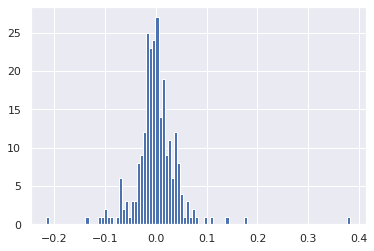

In [25]:
df.Daily_change.hist(bins = 100)

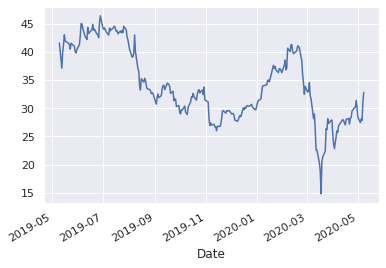

In [26]:
df.Close.plot()

FILTROWANIE DANYCH

In [27]:
df.Daily_change > 0

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15     True
2019-05-16     True
              ...  
2020-05-04    False
2020-05-05     True
2020-05-06    False
2020-05-07     True
2020-05-08     True
Name: Daily_change, Length: 252, dtype: bool

In [31]:
df_positive = df[df.Daily_change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.9600,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.5100,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.5700,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2020-04-28,31.00,31.8300,29.36,30.12,27383197,30.560,30.08,0.001330
2020-04-29,31.00,32.0000,30.33,31.37,28288120,31.185,30.12,0.041501
2020-05-05,28.25,28.9088,27.44,28.07,30725371,28.160,27.42,0.023705


In [32]:
df_positive.Daily_change.mean()

0.03032281284030735

In [33]:
df_negative = df[df.Daily_change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.29,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2020-04-21,27.50,28.15,26.600,27.19,20969116,27.345,28.19,-0.035474
2020-04-30,30.50,31.05,29.750,30.27,20095396,30.385,31.37,-0.035065
2020-05-01,29.13,29.72,28.325,28.39,19290192,28.760,30.27,-0.062108


In [34]:
df_negative.Daily_change.mean()

-0.026898126994441374

In [35]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2020-05-04    False
2020-05-05    False
2020-05-06    False
2020-05-07    False
2020-05-08    False
Length: 252, dtype: bool

In [36]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698


In [37]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303


In [39]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-04,31.45,31.7500,30.120,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.3000,27.970,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.5500,25.580,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.4200,26.450,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.6200,26.915,27.01,45263118,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...
2020-05-04,27.56,28.0700,26.580,27.42,23428333,27.490,28.39,-0.034167
2020-05-05,28.25,28.9088,27.440,28.07,30725371,28.160,27.42,0.023705
2020-05-06,27.50,28.0600,26.810,27.82,31076451,27.660,28.07,-0.008906


In [40]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [41]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [42]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2020-05-04,27.56,28.0700,26.58,27.42,23428333,27.490,28.39,-0.034167
2020-05-05,28.25,28.9088,27.44,28.07,30725371,28.160,27.42,0.023705
2020-05-06,27.50,28.0600,26.81,27.82,31076451,27.660,28.07,-0.008906


In [46]:
df[(df.index.month == 5) & (df.index.year == 2019)]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240,41.29,0.041414
2019-05-17,41.98,43.29,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.5000,41.25,9089469,41.150,41.50,-0.006024


In [47]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-07-01,46.98,47.0400,44.0600,44.27,17739998,45.625,46.38,-0.045494
2019-08-01,42.14,42.5355,41.0000,41.31,7349740,41.725,42.14,-0.019696
2019-10-01,30.37,30.5100,28.6500,29.15,13448055,29.760,30.47,-0.043321
2019-11-01,31.45,31.7000,30.7412,31.37,10460430,31.410,31.50,-0.004127
2020-04-01,26.50,26.7670,24.8101,25.42,38538381,25.960,27.92,-0.089542
2020-05-01,29.13,29.7200,28.3250,28.39,19290192,28.760,30.27,-0.062108
